## Telco Costumer Churn

Rotación de clientes:

Es cuando un cliente, usuario, suscriptor o cualquier tipo de cliente recurrente existente deja de hacer negocios o finaliza la relación con una empresa.

Tipos de pérdida de clientes:

Rotación contractual: cuando un cliente tiene un contrato para un servicio y decide cancelar el servicio, por ejemplo, TV por cable, SaaS.

Abandono voluntario: cuando un usuario cancela voluntariamente un servicio, por ejemplo, una conexión celular.
Rotación no contractual: cuando un cliente no tiene contrato para un servicio y decide cancelar el servicio, por ejemplo, Fidelización del Consumidor en tiendas minoristas.

Abandono involuntario: cuando se produce un abandono sin ninguna solicitud del cliente, por ejemplo, vencimiento de la tarjeta de crédito.

Razones para el abandono voluntario: Falta de uso, Servicio pobre, Mejor precio

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [16]:
raw_data = pd.read_csv('GEEKS - bigml_59c28831336c6604c800002a.csv')
data = raw_data.copy()
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Preprocesamiento

In [17]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [18]:
data.info()
#Vemos los datos y no parece haber faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

1. Vemos que en los datos no parece haber faltantes
2. Vamos a unificar las "columnas" con "minutos", "llamados" y cargos a una que sea "total", respectivamente.

In [19]:
#Simplificaremos las columnas con minutos totales de llamado dividido en tramos, a días completos
data['total minutes'] = data['total day minutes'] + data['total eve minutes'] + data['total night minutes']
data['total calls'] = data['total day calls'] + data['total eve calls'] + data['total night calls']
data['total charge'] = data['total day charge'] + data['total eve charge'] + data['total night charge']
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes,total calls,total charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,707.2,300,72.86
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,611.5,329,55.54
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,527.2,328,59.00
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,558.2,248,65.02
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,501.9,356,49.36


In [20]:
new_order = ['state', 'account length', 'area code', 'phone number','international plan', 
             'voice mail plan', 'number vmail messages','total minutes','total calls', 'total charge',
             'total day minutes', 'total day calls', 'total day charge','total eve minutes', 
             'total eve calls', 'total eve charge','total night minutes', 'total night calls', 'total night charge',
             'total intl minutes', 'total intl calls', 'total intl charge','customer service calls', 'churn']
data = data.reindex(columns=new_order)
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total minutes,total calls,total charge,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,707.2,300,72.86,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,611.5,329,55.54,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,527.2,328,59.00,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,558.2,248,65.02,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,501.9,356,49.36,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,650.8,286,57.43,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,575.8,235,60.94,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,661.5,258,63.93,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,512.6,326,56.18,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [25]:
data['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [33]:
data['state'].unique().size

51

In [24]:
data['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [26]:
data['voice mail plan'].unique()

array(['yes', 'no'], dtype=object)

In [35]:
data['churn'].unique()

array([False,  True])

Tenemos 4 tipos de datos categoricos, "international plan", "voice mail plan" y "churn" son binarios.
La columna "state" tiene 51 variables.
Vamos a explorar los datos como estan, antes de entrenar el modelo haremos la transformación One-Hot.

## Exploración de Datos

In [36]:
data.describe()

,account length,area code,number vmail messages,total minutes,total calls,total charge,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,581.627483,300.657666,56.685173,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,89.969330,34.328232,10.487816,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,275.200000,188.000000,19.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,521.000000,278.000000,49.590000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,583.100000,301.000000,56.630000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,642.500000,324.000000,63.650000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,876.900000,410.000000,92.560000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [40]:
df_eda = data.copy()
#creamos una lista con las columnas que no necesitamos.
cols_delete = ['area code','phone number','total day calls','total day minutes', 'total day charge', 'total eve calls','total eve minutes', 
               'total eve charge', 'total night calls','total night minutes', 'total night charge']
df_eda = df_eda.drop(cols_delete, axis=1)
df_eda

,state,account length,international plan,voice mail plan,number vmail messages,total minutes,total calls,total charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,707.2,300,72.86,10.0,3,2.70,1,False
1,OH,107,no,yes,26,611.5,329,55.54,13.7,3,3.70,1,False
2,NJ,137,no,no,0,527.2,328,59.00,12.2,5,3.29,0,False
3,OH,84,yes,no,0,558.2,248,65.02,6.6,7,1.78,2,False
4,OK,75,yes,no,0,501.9,356,49.36,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,650.8,286,57.43,9.9,6,2.67,2,False
3329,WV,68,no,no,0,575.8,235,60.94,9.6,4,2.59,3,False
3330,RI,28,no,no,0,661.5,258,63.93,14.1,6,3.81,2,False
3331,CT,184,yes,no,0,512.6,326,56.18,5.0,10,1.35,2,False


<Axes: >

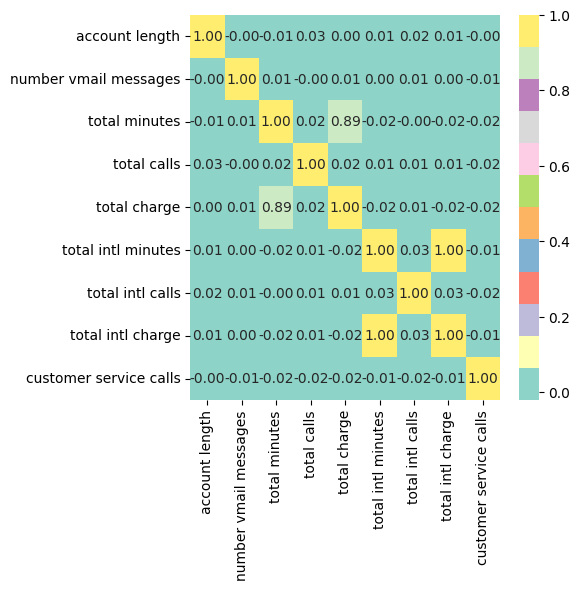

In [47]:
df_numeric = df_eda.select_dtypes(include='number')
plt.figure(figsize=(5,5))
sns.heatmap(df_numeric.corr(), fmt='.2f', annot=True, cmap='Set3')

Podemos ver que no hay una correlación marcada en los datos numericos, solamente "total minutes" con "total charges" que es bastante lógico.

In [70]:
df_eda['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [87]:
churn_true = df_eda['churn'].sum()
perc_true = churn_true / len(df_eda) * 100
print(len(df_eda))
print(perc_true)

3333
14.491449144914492


De un total de 3333 registros, tenemos 483 bajas que corresponden al 14.49% de los clientes.

<Axes: xlabel='churn', ylabel='customer service calls'>

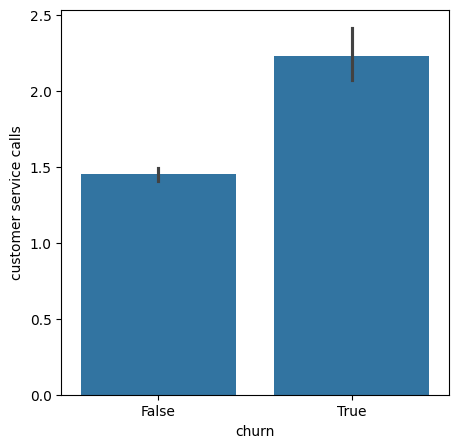

In [60]:
plt.figure(figsize=(5,5))
sns.barplot(x=df_eda['churn'], y=df_eda['customer service calls'])

Efectivamente, los clientes que realizan más llamados a atención al cliente son los que más abandonan.

<Axes: xlabel='churn', ylabel='total charge'>

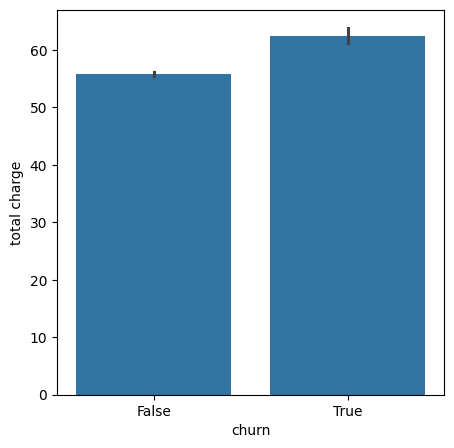

In [61]:
plt.figure(figsize=(5,5))
sns.barplot(x=df_eda['churn'], y=df_eda['customer service calls'])

También los que reciben más cargos, pero no parece ser una diferencia significativa.

<Axes: xlabel='international plan', ylabel='churn'>

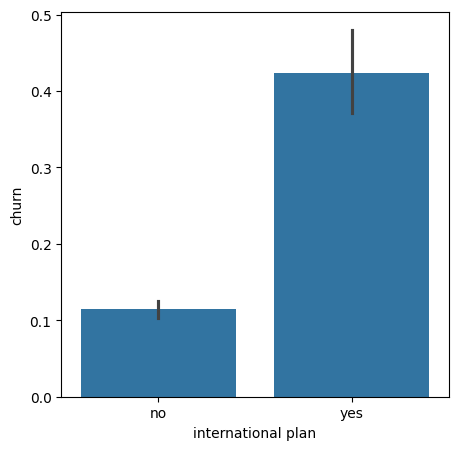

In [144]:
df_churn = df_eda.copy()
plt.figure(figsize=(5,5))
sns.barplot(x=df_eda['international plan'], y=df_eda['churn'])

Muchos de clientes que abandonan tienen "international plan" veamos que más podemos descubrir con respecto al plan.

<Axes: xlabel='churn', ylabel='total intl charge'>

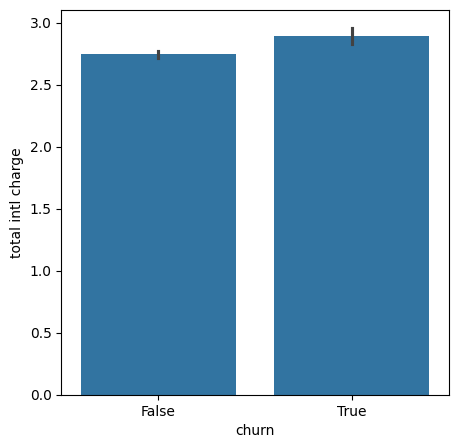

In [89]:
df_churn = df_eda.copy()
plt.figure(figsize=(5,5))
sns.barplot(x=df_eda['churn'], y=df_eda['total intl charge'])

Vamos a analizar la cantidad de clientes por "state" y las respectivas bajas, para definir que estas tienen más perdidas tanto en cantidad como en forma porcentual.

In [125]:
#churn_state = df_eda.groupby('state')['churn'].sum().sort_values(ascending=False)

churn_state = df_eda.groupby('state')['churn'].sum()
churn_state = pd.DataFrame(churn_state)

count_state = df_eda['state'].value_counts()
count_state = pd.DataFrame(count_state)

result_churn_state = pd.concat([churn_state,count_state], axis=1)
result_churn_state = result_churn_state.reset_index()

result_churn_state['percent churn'] = result_churn_state['churn'] / result_churn_state['count'] * 100
result_churn_state.sort_values(by = 'percent churn', ascending=False)

result_churn_state.head()

,state,churn,count,percent churn
0,AK,3,52,5.769231
1,AL,8,80,10.000000
2,AR,11,55,20.000000
3,AZ,4,64,6.250000
4,CA,9,34,26.470588


In [130]:
result_churn_state.describe()

,churn,count,percent churn
count,51.000000,51.000000,51.000000
mean,9.470588,65.352941,14.492688
std,4.001764,11.801396,5.757934
min,3.000000,34.000000,5.660377
25%,6.500000,59.500000,9.555691
50%,9.000000,65.000000,13.636364
75%,12.500000,72.500000,18.321859
max,18.000000,106.000000,26.470588


In [126]:
churn_top20 = result_churn_state.sort_values(by = 'percent churn', ascending=False).head(20)
churn_top20 = churn_top20.reset_index()
churn_top20

,index,state,churn,count,percent churn
0,31,NJ,18,68,26.470588
1,4,CA,9,34,26.470588
2,43,TX,18,72,25.000000
3,20,MD,17,70,24.285714
4,40,SC,14,60,23.333333
5,22,MI,16,73,21.917808
6,25,MS,14,65,21.538462
7,33,NV,14,66,21.212121
8,47,WA,14,66,21.212121
9,21,ME,13,62,20.967742


<Axes: xlabel='state', ylabel='percent churn'>

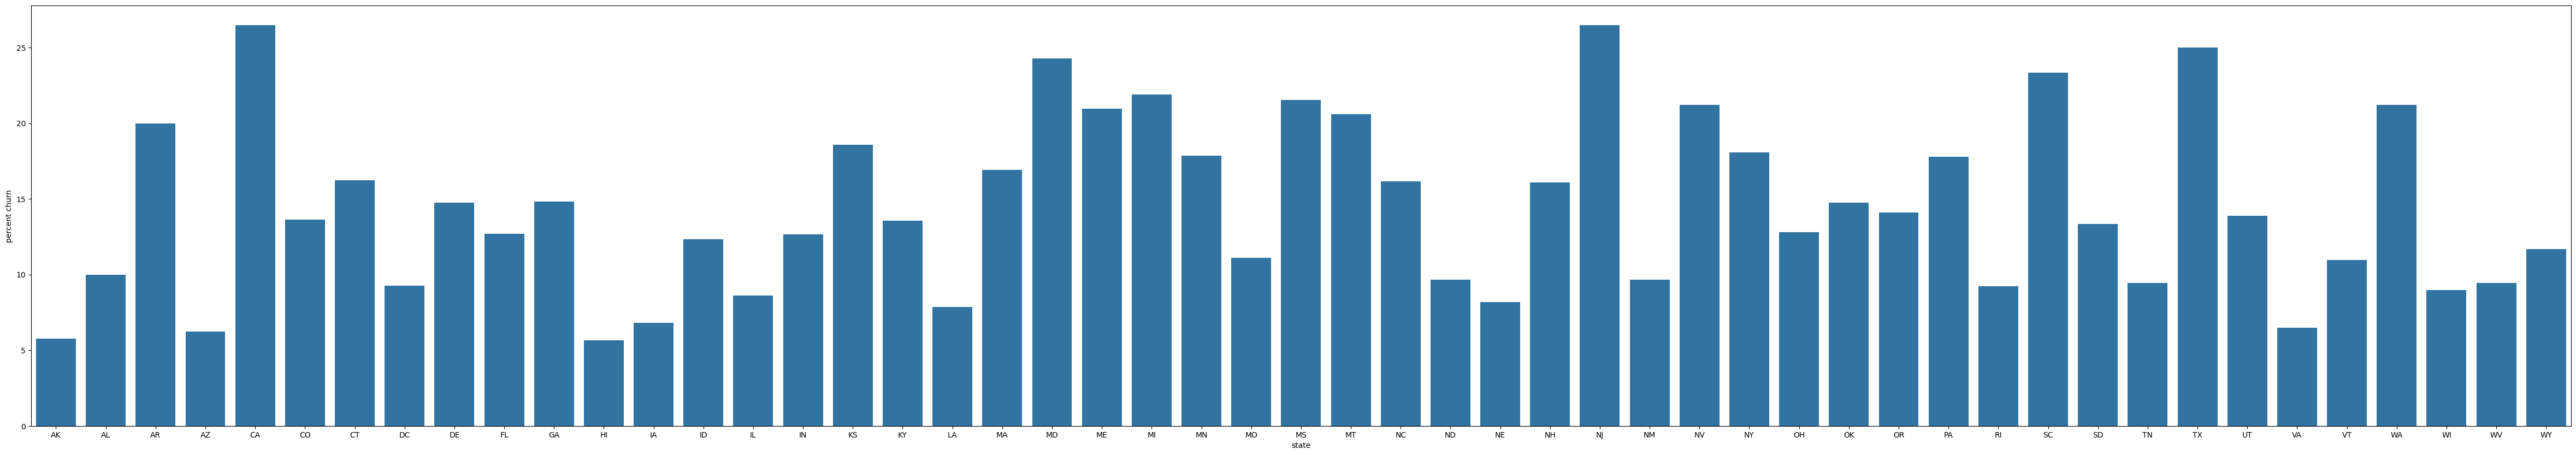

In [127]:
plt.figure(figsize=(60,10))
sns.barplot(x=result_churn_state['state'], y=result_churn_state['percent churn'])

<Axes: xlabel='state', ylabel='percent churn'>

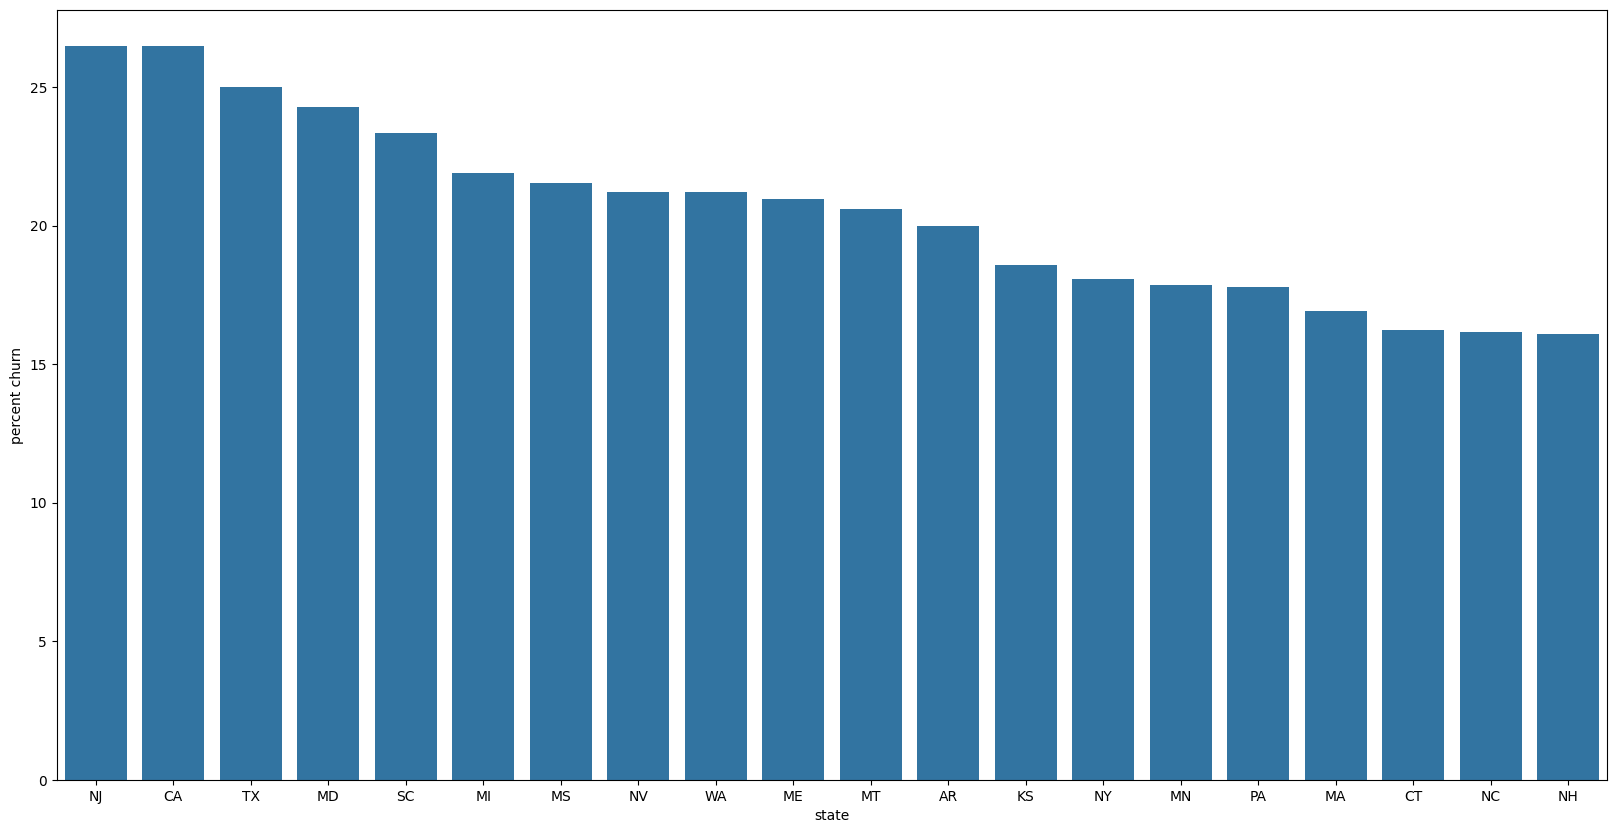

In [129]:
plt.figure(figsize=(20,10))
sns.barplot(x=churn_top20['state'], y=churn_top20['percent churn'])

Acá tenemos analizados los datos con los Estados con mayor porcentaje de abandono de clientes, esta es información importante para centrar los esfuerzos en zonas de relevancia.

Podemos ver que Nuevo Mexico, California y Textas son los estados con mayor pérdida. Pero hay una linea muy delgada entre la diferencia de estado a estado, por lo que dificulta poner un valor claro para dividirlo en grupos de trabajo, por eso simplemnte optaria por tratar el top10 o top5.

## Distribución de variables

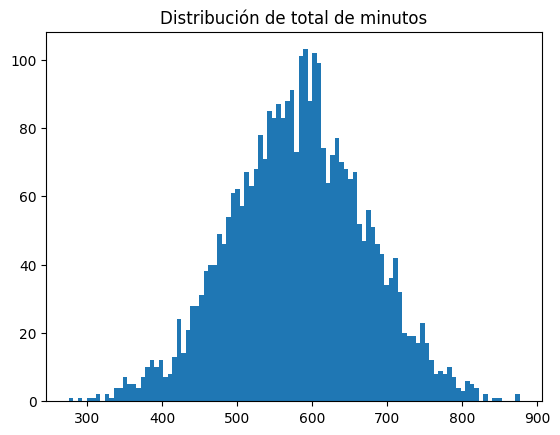

In [136]:
plt.hist(df_eda['total minutes'], bins=100)
plt.title('Distribución de total de minutos')
plt.show()

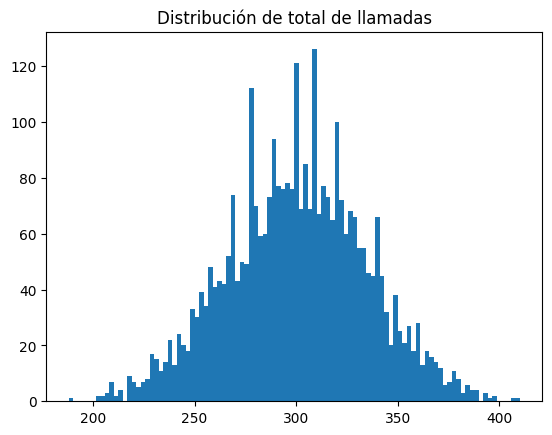

In [137]:
plt.hist(df_eda['total calls'], bins=100)
plt.title('Distribución de total de llamadas')
plt.show()

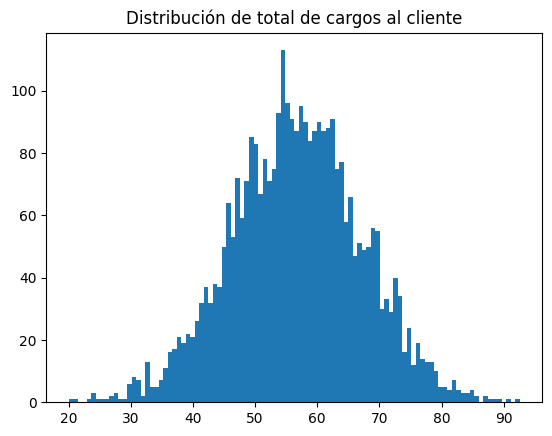

In [138]:
plt.hist(df_eda['total charge'], bins=100)
plt.title('Distribución de total de cargos al cliente')
plt.show()

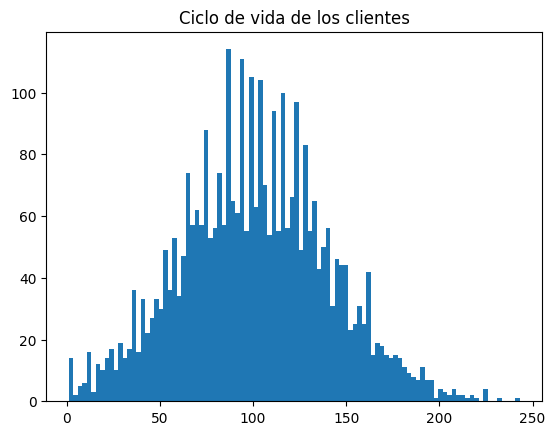

In [140]:
plt.hist(df_eda['account length'], bins=100)
plt.title('Ciclo de vida de los clientes')
plt.show()

Como podemos ver los datos de uso de minutos, llamadas y cargos se distribuyen normalmente. Pero tambien el ciclo de vida, por lo que podemos detectar que una vez alcanzada la longitud de 100 comienza a decaer.

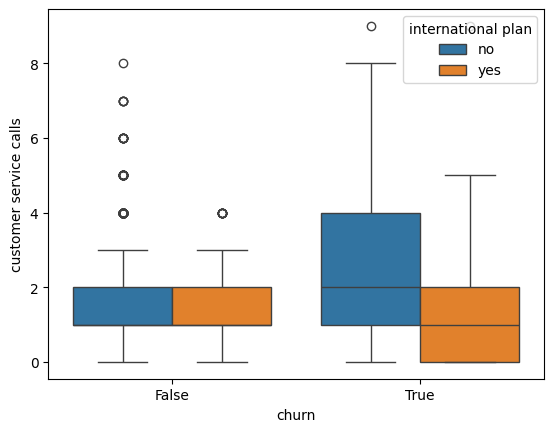

In [147]:
sns.boxplot(x = 'churn', 
            y = 'customer service calls', 
            data = df_eda, 
            #sym = "",                   
            hue = "international plan"
           ) 
plt.show()

## Preprocesamiento de los datos para prepararlos para el modelo
Convertimos las variables categoricas a numericas.

In [162]:
df_unscaled = df_eda.copy()
df_unscaled.head()

,state,account length,international plan,voice mail plan,number vmail messages,total minutes,total calls,total charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,707.2,300,72.86,10.0,3,2.70,1,False
1,OH,107,no,yes,26,611.5,329,55.54,13.7,3,3.70,1,False
2,NJ,137,no,no,0,527.2,328,59.00,12.2,5,3.29,0,False
3,OH,84,yes,no,0,558.2,248,65.02,6.6,7,1.78,2,False
4,OK,75,yes,no,0,501.9,356,49.36,10.1,3,2.73,3,False


In [163]:
df_unscaled['international plan'] = df_unscaled['international plan'].map({'no':0,'yes':1})
df_unscaled['voice mail plan'] = df_unscaled['voice mail plan'].map({'no':0,'yes':1})
df_unscaled['churn'] = df_unscaled['churn'].map({False:0,True:1})
df_unscaled.head()

,state,account length,international plan,voice mail plan,number vmail messages,total minutes,total calls,total charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,707.2,300,72.86,10.0,3,2.70,1,0
1,OH,107,0,1,26,611.5,329,55.54,13.7,3,3.70,1,0
2,NJ,137,0,0,0,527.2,328,59.00,12.2,5,3.29,0,0
3,OH,84,1,0,0,558.2,248,65.02,6.6,7,1.78,2,0
4,OK,75,1,0,0,501.9,356,49.36,10.1,3,2.73,3,0


In [168]:
df_unscaled['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

Ahora queda transformar la categoría "state" a One-Hot, pero antes dividimos los datos en variables y objetivos

In [238]:
X_unscaled = df_unscaled.drop(['churn'], axis=1)
Y = df_unscaled['churn']

In [239]:
X = X_unscaled.copy()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total minutes           3333 non-null   float64
 6   total calls             3333 non-null   int64  
 7   total charge            3333 non-null   float64
 8   total intl minutes      3333 non-null   float64
 9   total intl calls        3333 non-null   int64  
 10  total intl charge       3333 non-null   float64
 11  customer service calls  3333 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 312.6+ KB


In [240]:
X = pd.get_dummies(X, columns=['state']).astype(np.int64)
Y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

## Division de entramiento y prueba

In [241]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,train_size=0.8, test_size=0.2,random_state=0)

## Modelos de prueba

In [258]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, Y_train)
Y_pred_2 = model_RFC.predict(X_valid)
mean_absolute_error(Y_valid, Y_pred_2)

0.02848575712143928

Aunque los 3 dieron buenos resultados, Random Forest parece haberse ajustado muy bien y es el que mas probabilidad nos entrega

## Confussion Matrix

In [259]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_valid, Y_pred_2)

array([[574,   5],
       [ 14,  74]], dtype=int64)

A partir de la matriz podemos definir:

Verdaderos positivos TP: 74
Verdaderos negativos TN: 574
Falsos positivos FP: 5
Falsos negativos FN: 14

Preción: 0.93